In [1]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import os

# Read the provided text files
resume_file = r'C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Untitled Folder\resume.txt'
job_postings_folder = r'C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Untitled Folder\job_postings'


def parse_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file: 
        soup = BeautifulSoup(file, 'html.parser')
        text = soup.get_text(separator=' ')
        return text

# Parse HTML content from job postings in the job_postings folder
parsed_job_postings = []
for filename in os.listdir(job_postings_folder):
    file_path = os.path.join(job_postings_folder, filename)
    if os.path.isfile(file_path) and filename.endswith('.html'):
        parsed_posting = parse_html(file_path)
        parsed_job_postings.append(parsed_posting)

with open(resume_file, 'r') as file:
    resume_text = file.read()


In [2]:
resume_text

'Experience\n\n1. Developed probability simulations using NumPy.\n2. Assessed online ad-clicks for statistical significance using Permutation testing.\n3. Analyzed disease outbreaks using common clustering algorithms.\n\nAdditional Skills\n\n1. Data visualization using Matplotlib.\n2. Statistical analysis using SciPy.\n3. Processing structured tables using Pandas.\n4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.\n5. Extracting locations from text using GeonamesCache.\n6. Location analysis and visualization using GeonamesCache and Basemap.\n7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.\n8. NLP analysis and text topic detection using Scikit-Learn.'

In [3]:
# Remove newlines and extra spaces
resume_cleaned_text = re.sub(r'\s+', ' ', resume_text.replace('\n', ' '))

# Remove non-alphanumeric characters and extra spaces
resume_cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', resume_cleaned_text)

# Remove leading and trailing spaces
resume_cleaned_text = resume_cleaned_text.strip()

resume_cleaned_text

'Experience 1 Developed probability simulations using NumPy 2 Assessed online adclicks for statistical significance using Permutation testing 3 Analyzed disease outbreaks using common clustering algorithms Additional Skills 1 Data visualization using Matplotlib 2 Statistical analysis using SciPy 3 Processing structured tables using Pandas 4 Executing KMeans clustering and DBSCAN clustering using ScikitLearn 5 Extracting locations from text using GeonamesCache 6 Location analysis and visualization using GeonamesCache and Basemap 7 Dimensionality reduction with PCA and SVD using ScikitLearn 8 NLP analysis and text topic detection using ScikitLearn'

In [4]:
len(resume_cleaned_text)

652

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Create a spaCy document
doc = nlp(resume_cleaned_text)

# Lemmatize the tokens and remove stop words
cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop]

# Join the tokens back to a cleaned text string
resume_cleaned_text = ' '.join(cleaned_tokens)

print(resume_cleaned_text)

experience 1 develop probability simulation NumPy 2 assess online adclick statistical significance permutation test 3 analyze disease outbreak common clustering algorithm Additional Skills 1 Data visualization Matplotlib 2 statistical analysis SciPy 3 processing structured table Pandas 4 execute KMeans cluster dbscan clustering ScikitLearn 5 extract location text GeonamesCache 6 Location analysis visualization GeonamesCache Basemap 7 Dimensionality reduction PCA SVD ScikitLearn 8 nlp analysis text topic detection ScikitLearn


In [6]:
len(resume_cleaned_text)

530

In [7]:
resume_cleaned_text = ' '.join(cleaned_tokens)

In [8]:
from num2words import num2words

# Split the cleaned text into individual words
words = resume_cleaned_text.split()

# Convert numbers to words
converted_words = []
for word in words:
    if word.isdigit():
        converted_word = num2words(int(word))
        converted_words.append(converted_word)
    else:
        converted_words.append(word)

resume_cleaned_text = ' '.join(converted_words)

print(resume_cleaned_text)


experience one develop probability simulation NumPy two assess online adclick statistical significance permutation test three analyze disease outbreak common clustering algorithm Additional Skills one Data visualization Matplotlib two statistical analysis SciPy three processing structured table Pandas four execute KMeans cluster dbscan clustering ScikitLearn five extract location text GeonamesCache six Location analysis visualization GeonamesCache Basemap seven Dimensionality reduction PCA SVD ScikitLearn eight nlp analysis text topic detection ScikitLearn


In [9]:
resume_cleaned_text

'experience one develop probability simulation NumPy two assess online adclick statistical significance permutation test three analyze disease outbreak common clustering algorithm Additional Skills one Data visualization Matplotlib two statistical analysis SciPy three processing structured table Pandas four execute KMeans cluster dbscan clustering ScikitLearn five extract location text GeonamesCache six Location analysis visualization GeonamesCache Basemap seven Dimensionality reduction PCA SVD ScikitLearn eight nlp analysis text topic detection ScikitLearn'

In [10]:
resume_data = {'Resume Text': [resume_cleaned_text]}
df = pd.DataFrame(resume_data)

In [11]:
df['Resume Text']

0    experience one develop probability simulation ...
Name: Resume Text, dtype: object

In [32]:
from tqdm import tqdm
import re
from num2words import num2words
import demoji
import contractions
import spacy

# Load the English language model in SpaCy
nlp = spacy.load('en_core_web_sm')

# contractions
df['Clean Resume Text'] = df['Resume Text'].swifter.apply(contractions.fix)

# Lowercase the 'Cleaned Job Postings' column
df['Clean Resume Text'] = df['Clean Resume Text'].str.lower()
    
# Remove URLs
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
   
# Remove special characters and extra spaces
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: re.sub(r'\s+', ' ', x))
    
# Remove emojis
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(demoji.replace)

# Tokenize the text
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: [token.text for token in nlp(x)])

# Join the tokens back to a cleaned text string
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: ' '.join(x))

# Lemmatize the tokens
df['Clean Resume Text'] = df['Clean Resume Text'].swifter.apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

df['Clean Resume Text'].head()

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

0    experience one develop probability simulation numpy two assess online adclick statistical significance permutation test three analyze disease outbreak common clustering algorithm additional skill one datum visualization matplotlib two statistical analysis scipy three processing structure table panda four execute kmeans cluster dbscan cluster scikitlearn five extract location text geonamescache six location analysis visualization geonamescache basemap seven dimensionality reduction pca svd scikitlearn eight nlp analysis text topic detection scikitlearn
Name: Clean Resume Text, dtype: object

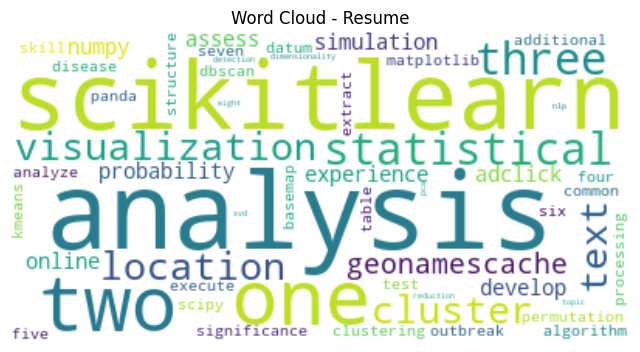

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

resume_text = df['Clean Resume Text'][0] 

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(resume_text)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Resume")
plt.axis('off')

plt.show()

['analysis', 'scikitlearn', 'one', 'two', 'statistical', 'three', 'visualization', 'cluster', 'location', 'text']


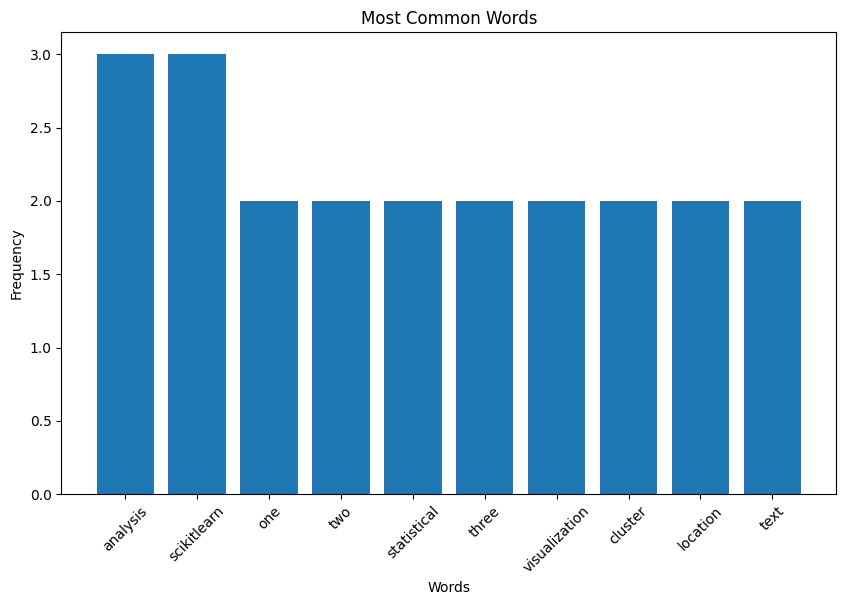

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df['Clean Resume Text'])

# Tokenize the text into individual words
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)  

# Extract the words and frequencies into separate lists
words, frequencies = zip(*top_words)

# Print the top words
stop_words = []
for word, count in top_words:
    stop_words.append(word)
print(stop_words)
    
# bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [62]:
import pandas as pd

custom_stop_words = ['one', 'two', 'three']

# Remove the custom stop words from df['Clean Resume Text']
df['Clean Resume Text'] = df['Clean Resume Text'].replace(custom_stop_words, '', regex=True)

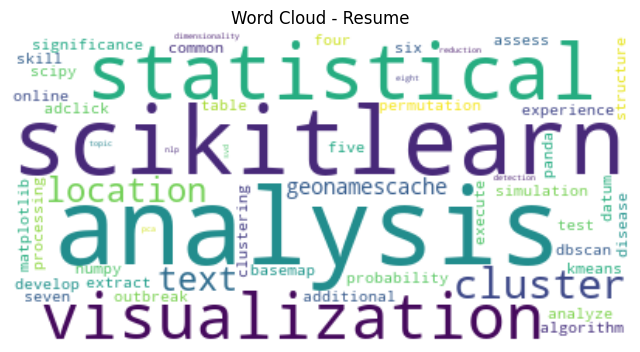

In [63]:
resume_text = df['Clean Resume Text'][0] 

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(resume_text)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Resume")
plt.axis('off')

plt.show()

In [47]:
stop_words

['and',
 'to',
 'the',
 'of',
 'be',
 'in',
 'a',
 'with',
 'for',
 'datum',
 'or',
 'experience',
 'work',
 'as',
 'you',
 'we',
 'will',
 'our',
 'on',
 'team']

Word Frequency: The size or prominence of a word in the word cloud indicates its frequency or importance in the text data. Larger or bolder words often represent more frequent or significant terms.

Key Themes or Topics: Look for clusters or groups of related words in the word cloud. Words that appear close to each other or have similar sizes may indicate common themes or topics in the text. These clusters can provide a high-level summary of the main ideas or concepts present in the data.

Context and Prior Knowledge: Interpret the word cloud by considering the context of the text and your prior knowledge. Understand the domain or subject matter of the text data to make meaningful interpretations. Consider the specific context in which the word cloud was generated, such as the dataset or analysis purpose.

Word Associations: Identify word associations or co-occurrences within the word cloud. Look for words that frequently appear together, which can indicate relationships or patterns in the text. These associations can help reveal connections between different concepts or provide insights into the context of the data.

Outliers or Surprising Words: Pay attention to outliers or words that may be unexpected or surprising in the word cloud. These words might be less frequent in the overall text but can still provide valuable insights or highlight unique aspects of the data.

Iterative Analysis: Use the word cloud as a starting point for further analysis. Explore the underlying data and conduct more detailed examinations of specific words or clusters. Consider conducting additional analyses such as sentiment analysis, topic modeling, or keyword extraction to gain deeper insights.

In [13]:
len(parsed_job_postings)

1458

In [14]:
import pandas as pd

job_data = {'Job Postings': parsed_job_postings}
df_jobs = pd.DataFrame(job_data)

len(df_jobs)

1458

In [15]:
df_jobs['Job Postings']

0       Data Scientist - Beavercreek, OH \n Data Scien...
1       Data Scientist - Seattle, WA 98101 \n Data Sci...
2       Data Scientist - Newark, CA \n Data Scientist ...
3       Patient Care Assistant / PCA - Med/Surg (Fayet...
4       Data Manager / Analyst - Oakland, CA \n Data M...
                              ...                        
1453    Data Scientist - Glen Mills, PA \n Data Scient...
1454    Data Analyst (Part-Time) - Austin, TX \n Data ...
1455    Manager - Business Development (Central and Ea...
1456    Natural Language Processing Undergraduate Inte...
1457    Political Staffer - San Francisco Bay Area, CA...
Name: Job Postings, Length: 1458, dtype: object

In [16]:
cleaned_job_postings = []
for job_posting in df_jobs['Job Postings']:
    clean_1 = re.sub(r'\s+', ' ', job_posting.replace('\n', ' '))
    clean_2 = re.sub(r'[^a-zA-Z0-9\s]', '', clean_1)
    clean_3 = clean_2.strip()
    cleaned_job_postings.append(clean_3)

cleaned_job_postings

['Data Scientist  Beavercreek OH Data Scientist  Beavercreek OH Data Scientist Position Overview Centauri is looking for a detail oriented motivated and organized Data Scientist to work as part of a team to clean analyze and produce insightful reporting on government data The ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action They must have strong experience using a variety of data miningdata analysis methods using a variety of data tools building and implementing models usingcreating algorithms and producing easily understood visuals to represent findings Candidate will work closely with Data Managers and stakeholders to tailor their analysis to answer key questions The candidate must have a strong understanding of Geographic Information Systems GIS and statistical analysis Responsibilities Use statistical research methods to

In [17]:
len(cleaned_job_postings)

1458

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
df_jobs['Cleaned Job Postings'] = cleaned_job_postings

df_jobs['Cleaned Job Postings'][0:1]

0    Data Scientist  Beavercreek OH Data Scientist ...
Name: Cleaned Job Postings, dtype: object

In [20]:
pd.set_option('display.max_colwidth', -1)
df_jobs['Cleaned Job Postings'][0:1]

C:\Users\Owner\AppData\Local\Temp\ipykernel_44300\1714733325.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0    Data Scientist  Beavercreek OH Data Scientist  Beavercreek OH Data Scientist Position Overview Centauri is looking for a detail oriented motivated and organized Data Scientist to work as part of a team to clean analyze and produce insightful reporting on government data The ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action They must have strong experience using a variety of data miningdata analysis methods using a variety of data tools building and implementing models usingcreating algorithms and producing easily understood visuals to represent findings Candidate will work closely with Data Managers and stakeholders to tailor their analysis to answer key questions The candidate must have a strong understanding of Geographic Information Systems GIS and statistical analysis Responsibilities Use statistical research methods

In [21]:
import re
from num2words import num2words
import swifter
def replace_numbers(match):
    number = int(match.group())
    return num2words(number)

def convert_numbers_to_words(text):
    pattern = r'\b\d+\b'
    converted_text = re.sub(pattern, replace_numbers, text)
    return converted_text

df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(convert_numbers_to_words)

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

In [22]:
df_jobs['Cleaned Job Postings'][1:2]

1    Data Scientist  Seattle WA ninety-eight thousand, one hundred and one Data Scientist  Seattle WA ninety-eight thousand, one hundred and one Are you interested in being a part of an Artificial Intelligence Marketing AIM company that is transforming how B2C enterprises engage with their customers improving customer experience marketing throughput and for the first time directly optimizing key business KPIs Do you want to join a startup company backed by the top firms in the venture capital and SaaS industries Would you like to be part of a company that prides itself on being a meritocracy where passion innovation integrity and our customers are at the heart of all that we do Then consider joining us at Amplero an Artificial Intelligence Marketing company that leverages machine learning and multiarmed bandit experimentation to dynamically test thousands of permutations to adaptively optimize every customer interaction and maximize customer lifetime value and loyalty We are growing ou

In [23]:
from tqdm import tqdm
import re
from num2words import num2words
import demoji
import contractions
import spacy

# Load the English language model in SpaCy
nlp = spacy.load('en_core_web_sm')

# contractions
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(contractions.fix)

# Lowercase the 'Cleaned Job Postings' column
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].str.lower()
    
# Remove URLs
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
   
# Remove special characters and extra spaces
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: re.sub(r'\s+', ' ', x))
    
# Remove emojis
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(demoji.replace)


Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

In [25]:
df_jobs['Cleaned Job Postings'].head()

0    data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri is looking for a detail oriented motivated and organized data scientist to work as part of a team to clean analyze and produce insightful reporting on government data the ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action they must have strong experience using a variety of data miningdata analysis methods using a variety of data tools building and implementing models usingcreating algorithms and producing easily understood visuals to represent findings candidate will work closely with data managers and stakeholders to tailor their analysis to answer key questions the candidate must have a strong understanding of geographic information systems gis and statistical analysis responsibilities use statistical research methods t

In [26]:
# Tokenize the text
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: [token.text for token in nlp(x)])
df_jobs['Cleaned Job Postings'].head()

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

0    [data, scientist, beavercreek, oh, data, scientist, beavercreek, oh, data, scientist, position, overview, centauri, is, looking, for, a, detail, oriented, motivated, and, organized, data, scientist, to, work, as, part, of, a, team, to, clean, analyze, and, produce, insightful, reporting, on, government, data, the, ideal, candidate, is, adept, at, using, large, data, sets, to, find, trends, for, intelligence, reporting, and, will, be, proficient, in, process, optimization, and, using, models, to, test, the, effectiveness, of, different, courses, of, action, they, must, have, strong, experience, using, a, variety, of, data, miningdata, analysis, methods, using, a, variety, of, data, tools, building, and, implementing, models, usingcreating, ...]                                                        
1    [data, scientist, seattle, wa, ninetyeight, thousand, one, hundred, and, one, data, scientist, seattle, wa, ninetyeight, thousand, one, hundred, and, one, are, you, interested, in,

In [28]:
# Join the tokens back to a cleaned text string
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: ' '.join(x))
df_jobs['Cleaned Job Postings'].head()

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

0    data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri is looking for a detail oriented motivated and organized data scientist to work as part of a team to clean analyze and produce insightful reporting on government data the ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action they must have strong experience using a variety of data miningdata analysis methods using a variety of data tools building and implementing models usingcreating algorithms and producing easily understood visuals to represent findings candidate will work closely with data managers and stakeholders to tailor their analysis to answer key questions the candidate must have a strong understanding of geographic information systems gis and statistical analysis responsibilities use statistical research methods t

In [29]:
# Lemmatize the tokens
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))
df_jobs['Cleaned Job Postings'].head()

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

0    data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri be look for a detail orient motivated and organized datum scientist to work as part of a team to clean analyze and produce insightful reporting on government datum the ideal candidate be adept at use large datum set to find trend for intelligence reporting and will be proficient in process optimization and use model to test the effectiveness of different course of action they must have strong experience use a variety of datum miningdata analysis method use a variety of data tool build and implement model usingcreate algorithm and produce easily understand visual to represent finding candidate will work closely with datum manager and stakeholder to tailor their analysis to answer key question the candidate must have a strong understanding of geographic information system gis and statistical analysis responsibility use statistical research method to analyze dataset produce through m

In [31]:
len(df_jobs['Cleaned Job Postings'])


1458

['and', 'to', 'the', 'of', 'be', 'in', 'a', 'with', 'for']


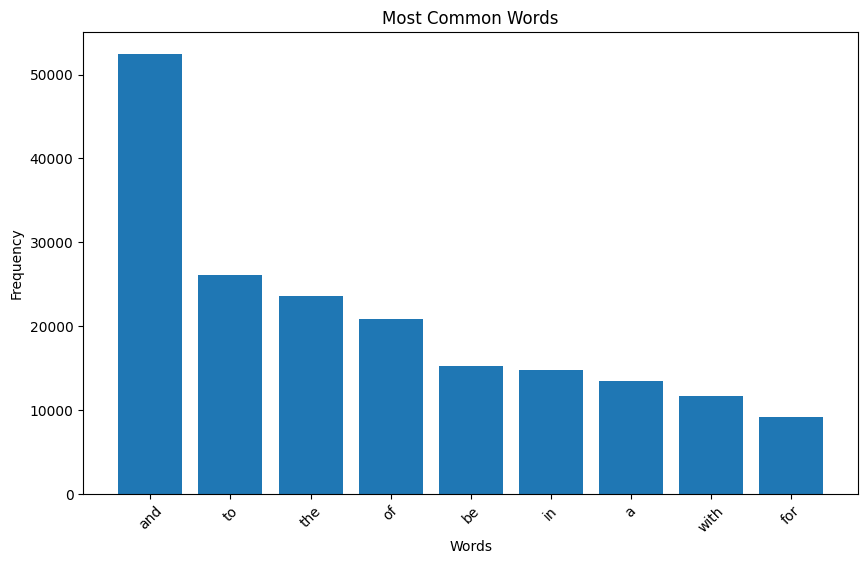

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df_jobs['Cleaned Job Postings'])

# Tokenize the text into individual words
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(9)  

# Extract the words and frequencies into separate lists
words, frequencies = zip(*top_words)

# Print the top words
stop_words = []
for word, count in top_words:
    stop_words.append(word)
print(stop_words)
    
# bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [65]:
import pandas as pd
import spacy

# Load the English language model in SpaCy
nlp = spacy.load('en_core_web_sm')

# Define the stop words to remove
stop_words = ['and', 'to', 'the', 'of', 'be', 'in', 'a', 'with', 'for']

# Function to remove stop words from a text
def remove_stop_words(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.text.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stop_words function to the 'Cleaned Job Postings' column
df_jobs['Cleaned Job Postings'] = df_jobs['Cleaned Job Postings'].swifter.apply(remove_stop_words)

Pandas Apply:   0%|          | 0/1458 [00:00<?, ?it/s]

In [68]:
len(df_jobs['Cleaned Job Postings'] )
job_postings_text = df_jobs['Cleaned Job Postings'].tolist()
job_postings_text

['data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri look detail orient motivated organized datum scientist work as part team clean analyze produce insightful reporting on government datum ideal candidate adept at use large datum set find trend intelligence reporting will proficient process optimization use model test effectiveness different course action they must have strong experience use variety datum miningdata analysis method use variety data tool build implement model usingcreate algorithm produce easily understand visual represent finding candidate will work closely datum manager stakeholder tailor their analysis answer key question candidate must have strong understanding geographic information system gis statistical analysis responsibility use statistical research method analyze dataset produce through multiple source intelligence production mine analyze datum from database answer key intelligence question assess effectivenes

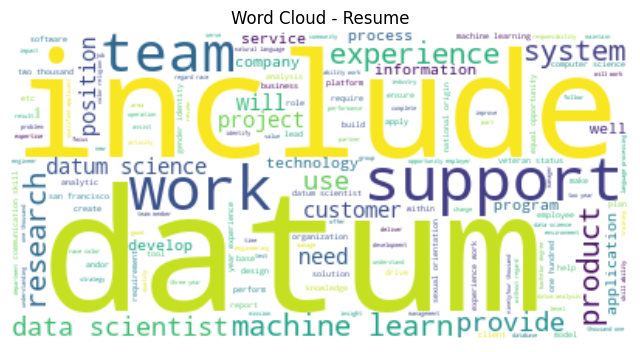

In [70]:
job_postings_text = ' '.join(df_jobs['Cleaned Job Postings'].tolist())

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(job_postings_text)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Resume")
plt.axis('off')
plt.show()

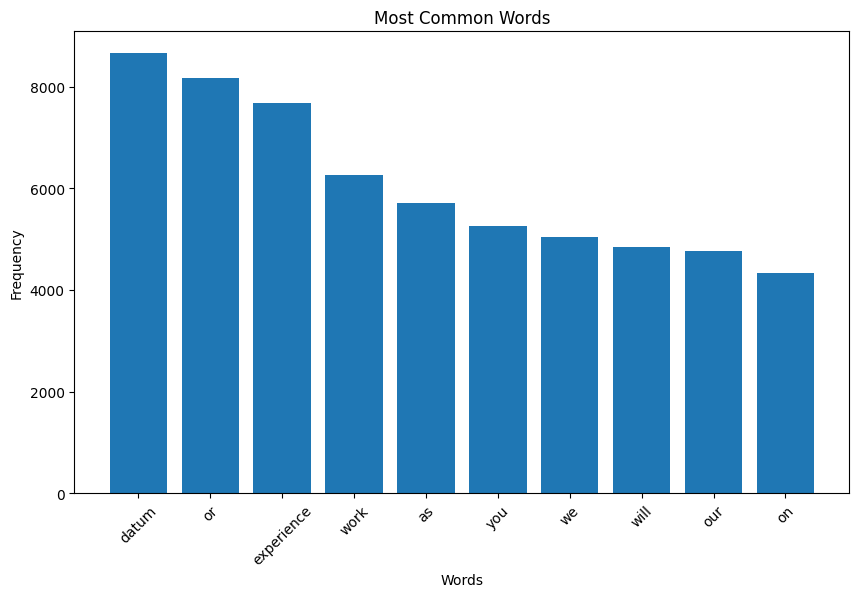

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df_jobs['Cleaned Job Postings'])

# Tokenize the text into individual words
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)  

# Extract the words and frequencies into separate lists
words, frequencies = zip(*top_words)

# bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [72]:
df_jobs['Cleaned Job Postings']


0       data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri look detail orient motivated organized datum scientist work as part team clean analyze produce insightful reporting on government datum ideal candidate adept at use large datum set find trend intelligence reporting will proficient process optimization use model test effectiveness different course action they must have strong experience use variety datum miningdata analysis method use variety data tool build implement model usingcreate algorithm produce easily understand visual represent finding candidate will work closely datum manager stakeholder tailor their analysis answer key question candidate must have strong understanding geographic information system gis statistical analysis responsibility use statistical research method analyze dataset produce through multiple source intelligence production mine analyze datum from database answer key intelligence question assess effect

In [91]:
data_keywords = ['data science', 'data analyst', 'data analysis', 'data scientist', 
                 'data engineer', 'data', 'analyst', 'information science', 'computer science', 
                 'machine learning', 'deep learning', 'natural language processing']

matching_job_postings = df_jobs[df_jobs['Cleaned Job Postings'].str.contains('|'.join(data_keywords), case=False)]

matching_job_postings

Job Posting #0:
data scientist beavercreek oh data scientist beavercreek oh data scientist position overview centauri look detail orient motivated organized datum scientist work as part team clean analyze produce insightful reporting on government datum ideal candidate adept at use large datum set find trend intelligence reporting will proficient process optimization use model test effectiveness different course action they must have strong experience use variety datum miningdata analysis method use variety data tool build implement model usingcreate algorithm produce easily understand visual represent finding candidate will work closely datum manager stakeholder tailor their analysis answer key question candidate must have strong understanding geographic information system gis statistical analysis responsibility use statistical research method analyze dataset produce through multiple source intelligence production mine analyze datum from database answer key intelligence question asses

In [92]:
len(matching_job_postings)

1240

In [ ]:
resume_skills = extracted_skills

# Iterate through the parsed job postings and compare skills
relevant_job_postings = []

for job_posting in parsed_job_postings:
    job_skills = re.findall(r'\b[A-Za-z\s]+\b', job_posting)
    matching_skills = set(resume_skills) & set(job_skills)
    if len(matching_skills) > 0:
        relevant_job_postings.append(job_posting)

print("Relevant Job Postings:")
for job_posting in relevant_job_postings:
    print(job_posting)

In [ ]:
len(relevant_job_postings)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Prepare Skill Data
skills = extracted_skills

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
skill_vectors = vectorizer.fit_transform(skills)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(skill_vectors)

# Apply K-means clustering
num_clusters = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(similarity_matrix)

# Step 5: Print the clusters for all skills
clusters = {}
for i, skill in enumerate(skills):
    cluster = cluster_labels[i]
    if cluster in clusters:
        clusters[cluster].append(skill)
    else:
        clusters[cluster] = [skill]

# Step 6: Print the clusters
for cluster, skills in clusters.items():
    print(f"Cluster {cluster+1}: {skills}")

In [ ]:
clusters

In [ ]:
skill_groups = {
    'Group1': ['Pandas', 'NumPy', 'Matplotlib', 'SciPy'],
    'Group2': ['K-Means clustering', 'DBSCAN clustering'],
    'Group3': ['Permutation testing', 'Scikit-Learn', 'PCA', 'SVD'],
    'Group4': ['GeonamesCache', 'Basemap'],
    'Group5': ['NLP analysis', 'Text topic detection']
}
# Data Analysis and Visualization: Pandas, NumPy, Matplotlib, SciPy
# Clustering Algorithms: K-Means clustering, DBSCAN clustering
# Machine Learning and Statistics: Permutation testing, Scikit-Learn, PCA (Principal Component Analysis), SVD (Singular Value Decomposition)
# Geospatial Analysis:GeonamesCache, Basemap
# Natural Language Processing: NLP analysis, Text topic detection
# K-Means clustering vs topic modeling

In [ ]:
# Generate word clouds for each group
for group, skills in clusters.items():
    # Concatenate skills into a single string
    skills_text = ' '.join(skills)

    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate(skills_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - {group}")
    plt.axis('off')
    plt.show()